# Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.


# Problem stmt:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.

have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
     

import warnings
warnings.filterwarnings('ignore')

In [31]:
df = pd.read_csv("loan_prediction.csv")
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [32]:
df.shape

(614, 13)

In [33]:
type(df)

pandas.core.frame.DataFrame

In [34]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Droping of missing data

In [35]:
df.dropna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [36]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1= ['Gender','Married','Education','Education','Self_Employed','Property_Area','Loan_Status','Dependents']

for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))
    
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [38]:
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [39]:
df=df.drop('Loan_ID',axis=1)

In [40]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [41]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [42]:
df.dropna()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [43]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [44]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [45]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan, strategy='mean')
df['LoanAmount']=imp.fit_transform(df['LoanAmount'].values.reshape(-1,1))

In [46]:
df['Loan_Amount_Term']=imp.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1))

In [47]:
df['Credit_History']=imp.fit_transform(df['Credit_History'].values.reshape(-1,1))
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [48]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [49]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

Hence number of Loan Status is not equal, so SMOTE is applied

In [50]:
pip install imbalanced-learn

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


Requirement already satisfied: imbalanced-learn in c:\users\humay\anaconda3\lib\site-packages (0.9.0)Note: you may need to restart the kernel to use updated packages.
Requirement already satisfied: scikit-learn>=1.0.1 in c:\users\humay\anaconda3\lib\site-packages (from imbalanced-learn) (1.0.2)
Requirement already satisfied: joblib>=0.11 in c:\users\humay\anaconda3\lib\site-packages (from imbalanced-learn) (1.0.1)
Requirement already satisfied: numpy>=1.14.6 in c:\users\humay\anaconda3\lib\site-packages (from imbalanced-learn) (1.20.1)
Requirement already satisfied: scipy>=1.1.0 in c:\users\humay\anaconda3\lib\site-packages (from imbalanced-learn) (1.6.2)
Requirement already satisfied: threadpoolctl>=2.0.0 in c:\users\humay\anaconda3\lib\site-packages (from imbalanced-learn) (2.1.0)

In [51]:
x=df.drop("Loan_Status", axis=1)
y=df["Loan_Status"]

In [52]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_sm, y_sm = sm.fit_resample(x, y)

print(f'''Shape of x before SMOTE: {x.shape}
Shape of x after SMOTE: {x_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of x before SMOTE: (614, 11)
Shape of x after SMOTE: (844, 11)

Balance of positive and negative classes (%):


1    50.0
0    50.0
Name: Loan_Status, dtype: float64

# Exploratory Data Analysis

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.838762,0.657980,0.842020,0.218241,0.237785,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,0.421752,0.484971,1.120531,0.413389,0.534737,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,2.000000,2.000000,4.000000,1.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


<AxesSubplot:xlabel='Dependents', ylabel='count'>

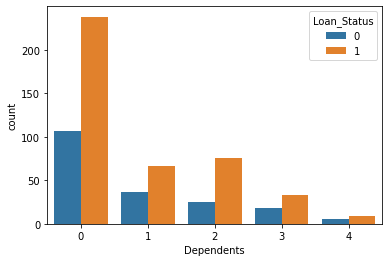

In [54]:
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Education', ylabel='count'>

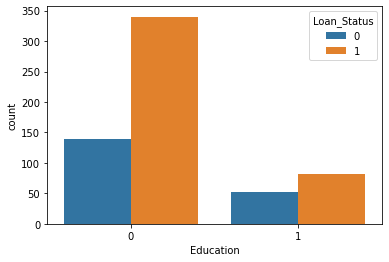

In [55]:
sns.countplot(x='Education',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

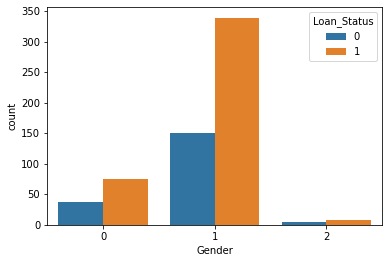

In [56]:
sns.countplot(x='Gender',hue='Loan_Status',data=df)

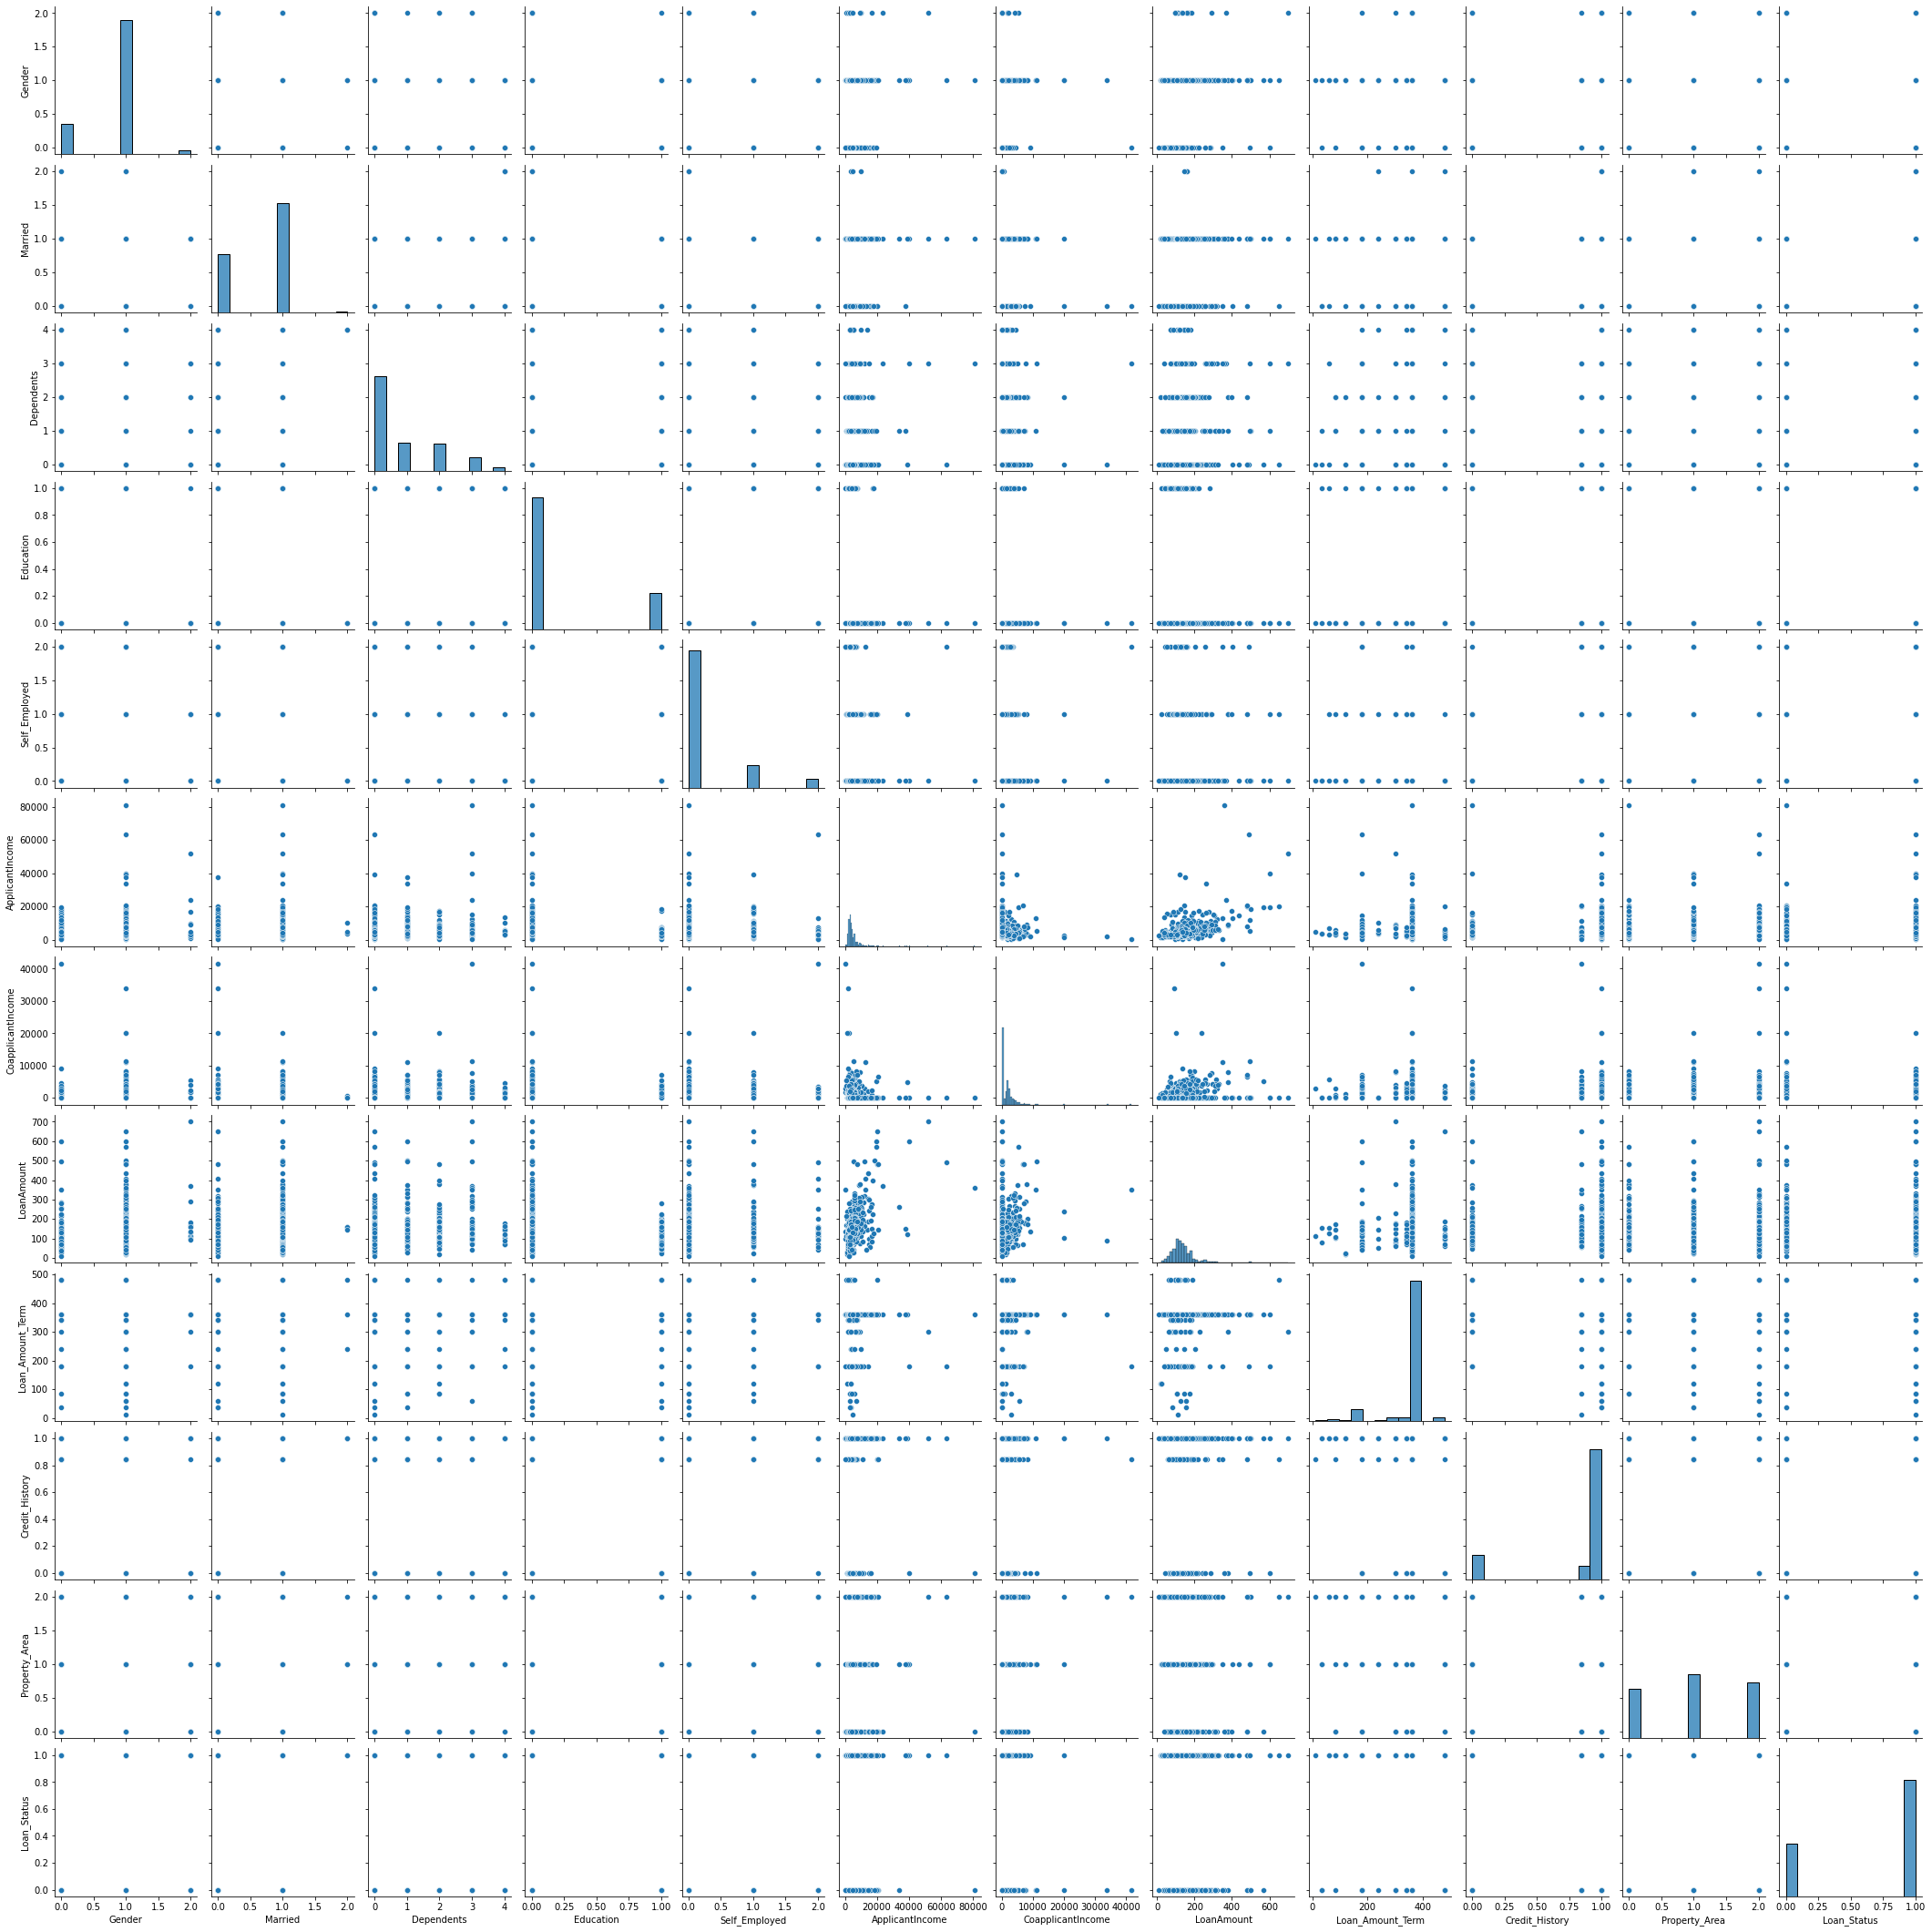

In [57]:
sns.pairplot(df)

In [58]:
df.skew()

Gender              -0.953015
Married             -0.538097
Dependents           1.089068
Education            1.367622
Self_Employed        2.191118
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [59]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold = 3
np.where(z>3)

(array([  9,  11,  14,  19,  24,  29,  30,  68,  94,  95, 107, 111, 114,
        126, 130, 133, 155, 155, 158, 170, 171, 171, 177, 177, 183, 185,
        218, 231, 236, 242, 262, 268, 278, 295, 308, 313, 333, 333, 333,
        336, 344, 369, 374, 380, 385, 402, 409, 411, 417, 432, 432, 443,
        447, 463, 468, 487, 495, 497, 506, 523, 525, 535, 542, 546, 561,
        575, 579, 581, 585, 600, 600, 601, 604], dtype=int64),
 array([6, 4, 8, 4, 4, 4, 4, 8, 8, 4, 4, 4, 4, 5, 7, 8, 5, 7, 4, 4, 5, 7,
        6, 7, 5, 5, 4, 4, 4, 8, 8, 4, 7, 4, 7, 8, 4, 5, 7, 4, 4, 7, 4, 4,
        4, 6, 5, 4, 6, 4, 7, 5, 4, 4, 4, 7, 8, 8, 7, 7, 7, 4, 4, 8, 7, 8,
        4, 6, 8, 4, 6, 4, 7], dtype=int64))

In [60]:
df_new_z = df[(z<3).all(axis=1)]
df_new_z

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


Data Loss

In [61]:
((614-548)/614)*100

10.749185667752444

Hence data loss is about mostly around 10 Percent is acceptable

In [62]:
import warnings
warnings.filterwarnings('ignore')
df_new_z.corr()['Loan_Status'].sort_values()

Education           -0.103196
LoanAmount          -0.027363
Self_Employed       -0.025740
Loan_Amount_Term    -0.011024
Dependents          -0.005975
ApplicantIncome      0.007848
Gender               0.011524
Property_Area        0.028109
CoapplicantIncome    0.038806
Married              0.102595
Credit_History       0.567327
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

In [63]:
df_new_z

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [64]:
df=df_new_z

# Data Modelling

In [65]:
x=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

In [66]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.31380803, -1.33378288, -0.8492977 , ...,  0.14049153,
         0.5172507 ,  1.19712929],
       [ 0.31380803,  0.68099491,  0.76111017, ...,  0.14049153,
         0.5172507 , -1.34544474],
       [ 0.31380803,  0.68099491, -0.8492977 , ...,  0.14049153,
         0.5172507 ,  1.19712929],
       ...,
       [ 0.31380803,  0.68099491,  0.76111017, ...,  0.14049153,
         0.5172507 ,  1.19712929],
       [ 0.31380803,  0.68099491,  1.24617213, ...,  0.14049153,
         0.5172507 ,  1.19712929],
       [-1.81208962, -1.33378288, -0.8492977 , ...,  0.14049153,
        -2.19219037,  0.01120413]])

In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.31380803, -1.33378288, -0.8492977 , ...,  0.14049153,
         0.5172507 ,  1.19712929],
       [ 0.31380803,  0.68099491,  0.76111017, ...,  0.14049153,
         0.5172507 , -1.34544474],
       [ 0.31380803,  0.68099491, -0.8492977 , ...,  0.14049153,
         0.5172507 ,  1.19712929],
       ...,
       [ 0.31380803,  0.68099491,  0.76111017, ...,  0.14049153,
         0.5172507 ,  1.19712929],
       [ 0.31380803,  0.68099491,  1.24617213, ...,  0.14049153,
         0.5172507 ,  1.19712929],
       [-1.81208962, -1.33378288, -0.8492977 , ...,  0.14049153,
        -2.19219037,  0.01120413]])

In [68]:
len(x)
len(y)

548

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.metrics import accuracy_score

In [70]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=i,test_size=0.7)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state", i,"The model perform very well")
        print("At random_state:-",i)
        print("Training accuracy score is ", round(accuracy_score(y_train,pred_train)*100,1))
        print("Training accuracy score is ", round(accuracy_score(y_test,pred_test)*100,1), '\n\n')

At random state 106 The model perform very well
At random_state:- 106
Training accuracy score is  79.9
Training accuracy score is  79.9 


At random state 130 The model perform very well
At random_state:- 130
Training accuracy score is  79.9
Training accuracy score is  79.9 


At random state 255 The model perform very well
At random_state:- 255
Training accuracy score is  79.9
Training accuracy score is  79.9 


At random state 286 The model perform very well
At random_state:- 286
Training accuracy score is  79.9
Training accuracy score is  79.9 


At random state 502 The model perform very well
At random_state:- 502
Training accuracy score is  79.9
Training accuracy score is  79.9 


At random state 597 The model perform very well
At random_state:- 597
Training accuracy score is  80.5
Training accuracy score is  80.5 


At random state 644 The model perform very well
At random_state:- 644
Training accuracy score is  79.9
Training accuracy score is  79.9 


At random state 743 The mod

In [71]:
x_train,y_test,y_train,y_test=train_test_split(x,y,test_size=.70,random_state=43)

In [72]:
from sklearn.metrics import classification_report

In [73]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.37      0.20      0.26       119
           1       0.70      0.85      0.77       265

    accuracy                           0.65       384
   macro avg       0.54      0.52      0.51       384
weighted avg       0.60      0.65      0.61       384



In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print("Accuracy", accuracy_score(y_test, preddt)*100)
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test, preddt))

Accuracy 54.6875
[[ 44  75]
 [ 99 166]]
              precision    recall  f1-score   support

           0       0.31      0.37      0.34       119
           1       0.69      0.63      0.66       265

    accuracy                           0.55       384
   macro avg       0.50      0.50      0.50       384
weighted avg       0.57      0.55      0.56       384



In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.22,random_state=43)

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
kmn=KNeighborsClassifier(n_neighbors=5)
kmn.fit(x_train,y_train)
kmn.score(x_train,y_train)
pred_kmn=kmn.predict(x_test)
print(accuracy_score(y_test,pred_kmn))
print(confusion_matrix(y_test,pred_kmn))
print(classification_report(y_test,pred_kmn))

0.7933884297520661
[[21 18]
 [ 7 75]]
              precision    recall  f1-score   support

           0       0.75      0.54      0.63        39
           1       0.81      0.91      0.86        82

    accuracy                           0.79       121
   macro avg       0.78      0.73      0.74       121
weighted avg       0.79      0.79      0.78       121



In [83]:
import pickle
filename = 'WineQuality.pkl'
pickle.dump(lr, open(filename,'wb'))

# 2.Checking basic details
Removing irrelavent columns

In [4]:

df.drop(['Loan_ID'],axis=1,inplace=True) 

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [6]:
df.shape
     

(614, 12)

In [7]:

print(df.isnull().sum())

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


Replacing null values with mean and mode values

In [8]:

df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode())

In [9]:
#Filling Null Values
df['Dependents'].fillna(value=df['Dependents'].mode()[0],inplace=True)
df['Gender'].fillna(value=df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(value=df['Married'].mode()[0],inplace=True)
df['Self_Employed'].fillna(value=df['Self_Employed'].mode()[0],inplace=True)

In [10]:
print(df.isnull().sum())

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [11]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


# 3.EDA

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

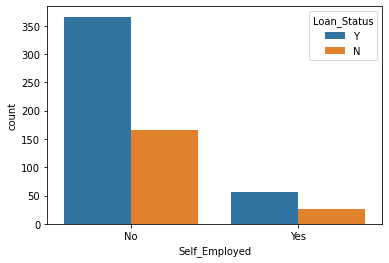

In [12]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

most of the data we have from not employed person Here we see if the person is not self employed there is high chances of approval

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

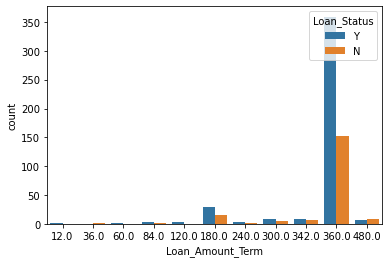

In [13]:
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=df)

Most of the people who applied for loan asked for 360 months of term more half are getting approved People those are taking loan for 480 months, most of them are getting approval

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

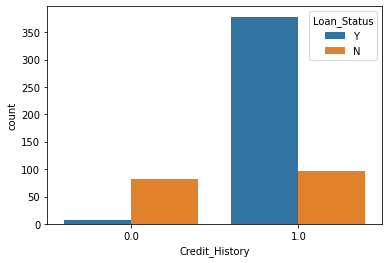

In [14]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

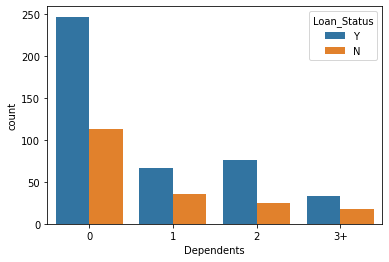

In [15]:
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

We can notice people those are not having dependents are getting chances of Loan approval

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

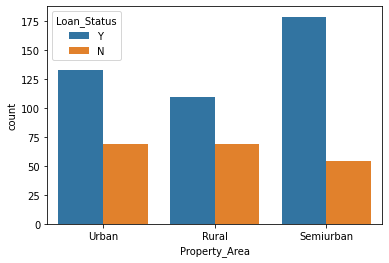

In [16]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

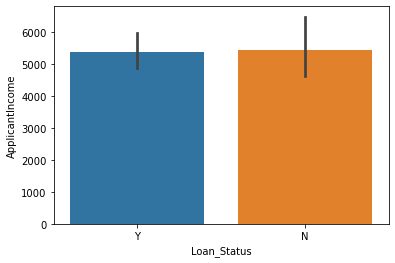

In [17]:

sns.barplot(y='ApplicantIncome',x='Loan_Status',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

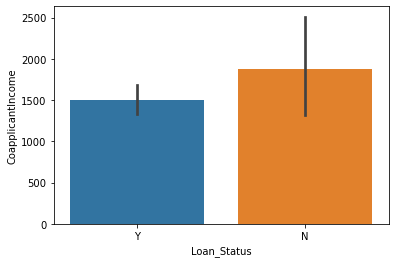

In [18]:
sns.barplot(y='CoapplicantIncome',x='Loan_Status',data=df)

<AxesSubplot:>

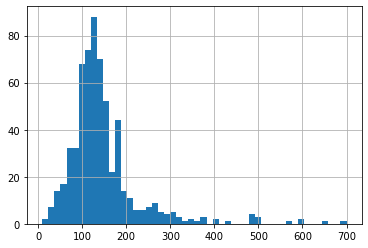

In [19]:
df['LoanAmount'].hist(bins=50)

In [20]:

df_corr=df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
df_corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,-0.364569,-0.172914,-0.045364,0.000525,0.005853,-0.172693,0.030239,-0.031319,-0.009963,0.082045,0.017987
Married,-0.364569,1.000000,0.334216,0.012304,0.004489,-0.003163,0.233224,0.003281,0.028283,-0.032441,0.003071,-0.091478
Dependents,-0.172914,0.334216,1.000000,0.055752,0.056798,0.079403,-0.007295,0.053924,0.056024,0.044415,0.001781,-0.010118
Education,-0.045364,0.012304,0.055752,1.000000,-0.010383,0.073543,0.084689,-0.072995,0.078645,0.037534,-0.003592,0.085884
Self_Employed,0.000525,0.004489,0.056798,-0.010383,1.000000,0.005906,-0.080509,-0.008925,0.008366,-0.002117,0.021996,0.003700
ApplicantIncome,0.005853,-0.003163,0.079403,0.073543,0.005906,1.000000,0.378095,0.365594,-0.013189,0.010961,0.078590,-0.018675
CoapplicantIncome,-0.172693,0.233224,-0.007295,0.084689,-0.080509,0.378095,1.000000,0.203701,0.060137,-0.066805,0.018346,-0.084419
LoanAmount,0.030239,0.003281,0.053924,-0.072995,-0.008925,0.365594,0.203701,1.000000,0.020456,0.007100,0.114591,0.040160
Loan_Amount_Term,-0.031319,0.028283,0.056024,0.078645,0.008366,-0.013189,0.060137,0.020456,1.000000,0.041755,-0.066941,0.085191
Credit_History,-0.009963,-0.032441,0.044415,0.037534,-0.002117,0.010961,-0.066805,0.007100,0.041755,1.000000,0.004238,0.423212


<AxesSubplot:>

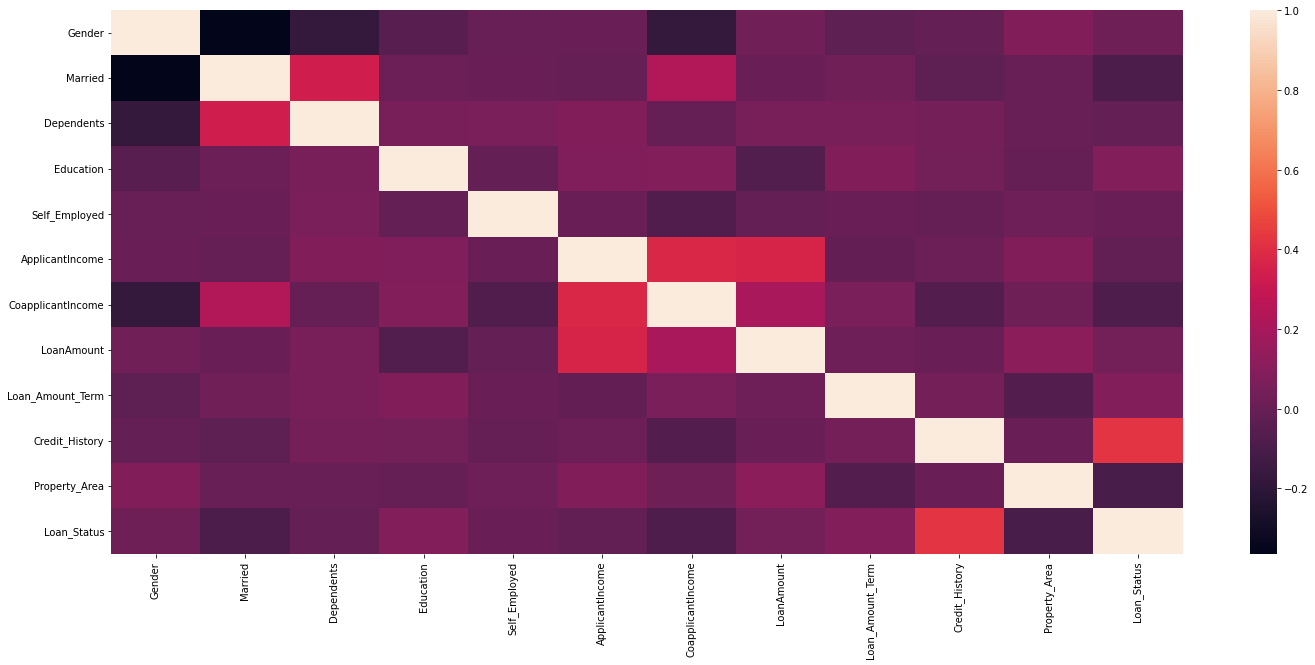

In [21]:

plt.figure(figsize=[24,10])
sns.heatmap(df_corr)

# 4. Data pre-processing

In [22]:

print(df.isnull().sum())

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


Encoding

In [23]:

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Education']=LE.fit_transform(df['Education'])
df['Gender']=LE.fit_transform(df['Gender'])
df['Married']=LE.fit_transform(df['Married'])
df['Dependents']=LE.fit_transform(df['Dependents'])
df['Self_Employed']=LE.fit_transform(df['Self_Employed'])
df['Property_Area']=LE.fit_transform(df['Property_Area'])
df['Loan_Status']=LE.fit_transform(df['Loan_Status'])

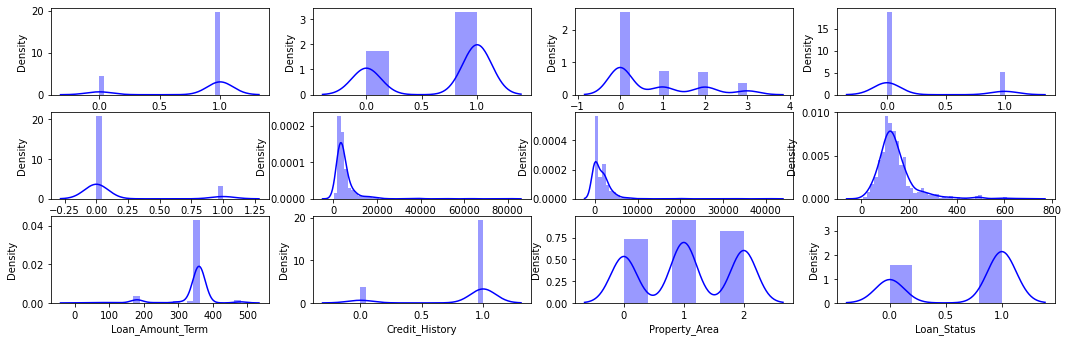

In [24]:

plt.figure(figsize=(18,15))
for i in enumerate(df.columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='b')

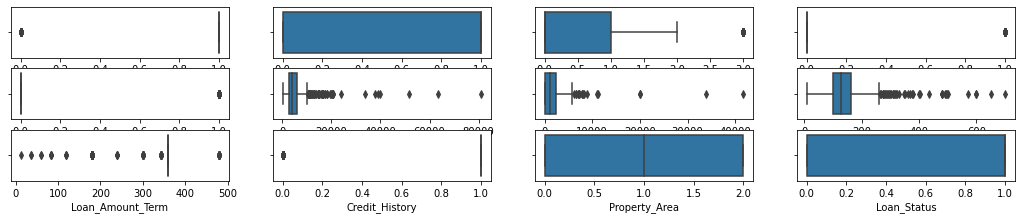

In [25]:
plt.figure(figsize=(18,10))
for o in enumerate(df):
    plt.subplot(9,4,o[0]+1)
    sns.boxplot(df[o[1]])

# skewness and outlier removal

In [26]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.882361
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [27]:
from scipy import stats
import numpy as np
print("Old Shape: ", df.shape)   
z = np.abs(stats.zscore(df))
print(z)
     

Old Shape:  (614, 12)
       Gender   Married  Dependents  Education  Self_Employed  \
0    0.472343  1.372089    0.737806   0.528362       0.392601   
1    0.472343  0.728816    0.253470   0.528362       0.392601   
2    0.472343  0.728816    0.737806   0.528362       2.547117   
3    0.472343  0.728816    0.737806   1.892641       0.392601   
4    0.472343  1.372089    0.737806   0.528362       0.392601   
..        ...       ...         ...        ...            ...   
609  2.117107  1.372089    0.737806   0.528362       0.392601   
610  0.472343  0.728816    2.236021   0.528362       0.392601   
611  0.472343  0.728816    0.253470   0.528362       0.392601   
612  0.472343  0.728816    1.244745   0.528362       0.392601   
613  2.117107  1.372089    0.737806   0.528362       2.547117   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.072991           0.554487    0.000000          0.279851   
1           0.134412           0.038732    0.219273

In [28]:

threshold = 3
print(np.where(z > 3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [29]:
after_zscore = df[(z < 3).all(axis=1)]

In [30]:

after_zscore.shape

(0, 12)